# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [64]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import random
import matplotlib.patches as mpatches
import matplotlib.colors as colors


## Notebook Presentation

In [26]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
folder = 'Files/'

df_hh_income = pd.read_csv(folder + 'Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv(folder + 'Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv(folder + 'Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv(folder + 'Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv(folder + 'Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [32]:
df_hh_income.info(), df_pct_poverty.info(), df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null 

(None, None, None)

In [34]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [35]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


## Data Cleaning - Check for Missing Values and Duplicates

In [36]:
df_hh_income.isnull().any()

,0
Geographic Area,False
City,False
Median Income,True


In [41]:
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)

In [42]:
df_hh_income.isnull().any()

,0
Geographic Area,False
City,False
Median Income,False


In [43]:
df_pct_poverty.isnull().any()

,0
Geographic Area,False
City,False
poverty_rate,False


In [44]:
df_pct_completed_hs.isnull().any()

,0
Geographic Area,False
City,False
percent_completed_hs,False


In [45]:
df_share_race_city.isnull().any()

,0
Geographic area,False
City,False
share_white,False
share_black,False
share_native_american,False
share_asian,False
share_hispanic,False


In [46]:
df_fatalities.isnull().any()

,0
id,False
name,False
date,False
manner_of_death,False
armed,True
age,True
gender,False
race,True
city,False
state,False


In [47]:
df_fatalities.armed.isnull().any().sum()

np.int64(1)

In [48]:
df_fatalities.race.isnull().any().sum()

np.int64(1)

In [49]:
df_fatalities.flee.isnull().any().sum()

np.int64(1)

In [50]:
# CHECK DUPLICATE ROWS
df_hh_income.duplicated().values.any()

np.False_

In [51]:
df_pct_poverty.duplicated().values.any()

np.False_

In [52]:
df_pct_completed_hs.duplicated().values.any()

np.False_

In [53]:
df_share_race_city.duplicated().values.any()

np.False_

In [54]:
df_fatalities.duplicated().values.any()

np.False_

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

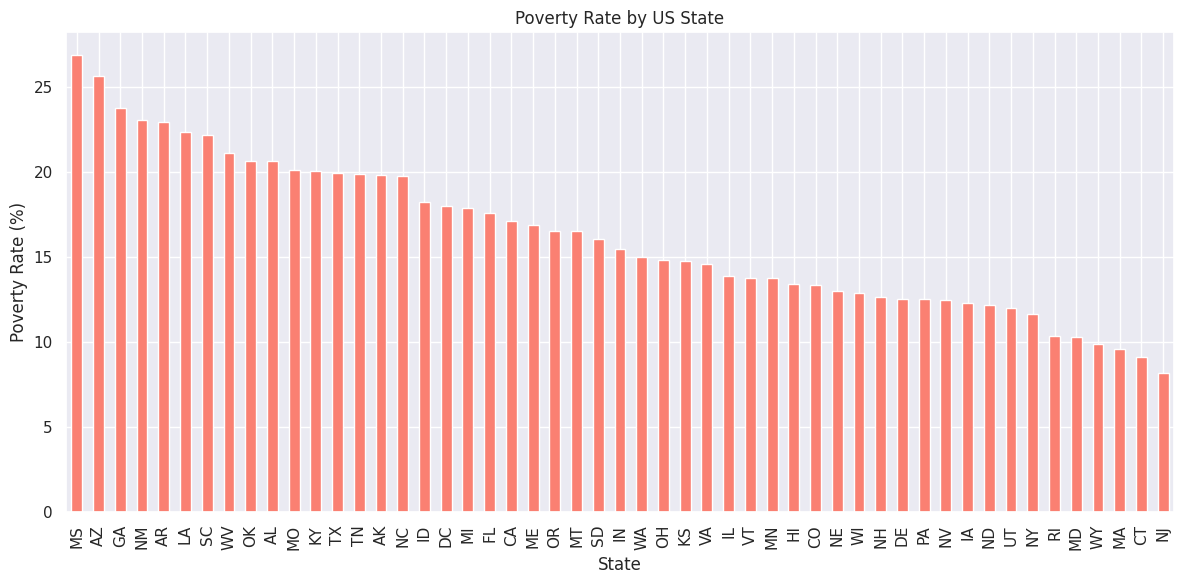

State with highest poverty rate: MS 26.88
State with lowest poverty rate: NJ 8.19


In [161]:
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
poverty_by_state.plot(kind='bar', color='salmon')
plt.title('Poverty Rate by US State')
plt.ylabel('Poverty Rate (%)')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("State with highest poverty rate:", poverty_by_state.idxmax(), round(poverty_by_state.max(), 2))
print("State with lowest poverty rate:", poverty_by_state.idxmin(), round(poverty_by_state.min(), 2))

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [72]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [81]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace('-', np.nan, regex=True)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].astype(float)

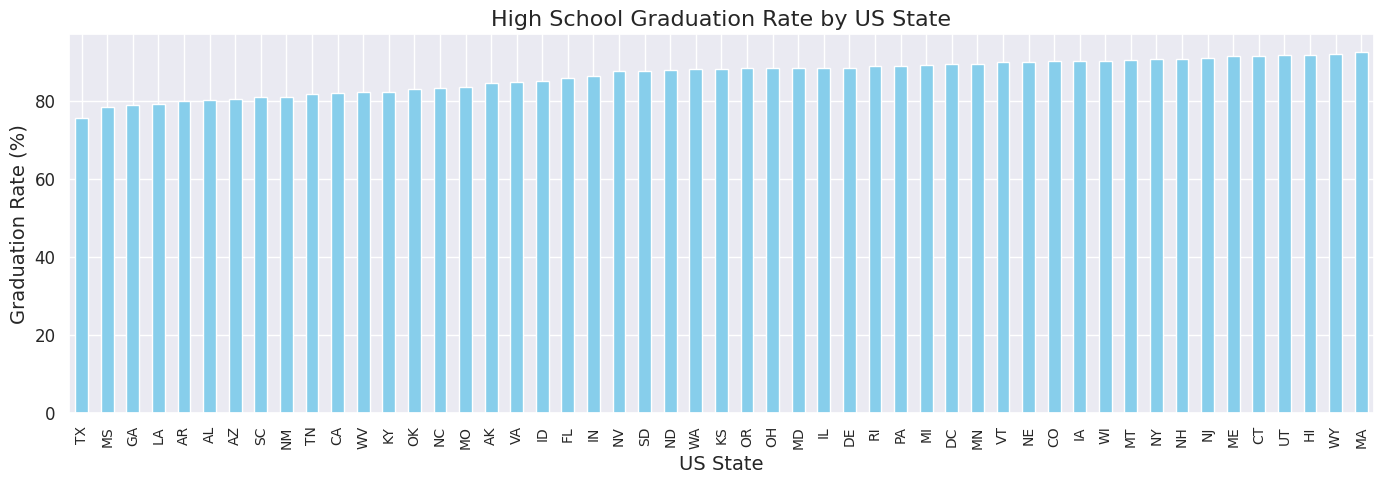

State with lowest graduation rate: TX 75.69
State with highest graduation rate: MA 92.4


In [162]:
graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()

plt.figure(figsize=(14,5))
graduation.plot(kind='bar', color='skyblue')
plt.title('High School Graduation Rate by US State', fontsize=16)
plt.ylabel('Graduation Rate (%)', fontsize=14)
plt.xlabel('US State', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

print("State with lowest graduation rate:", graduation.idxmin(), round(graduation.min(), 2))
print("State with highest graduation rate:", graduation.idxmax(), round(graduation.max(), 2))

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [83]:
graduation_vs = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()
graduation_vs

,percent_completed_hs
Geographic Area,
AK,84.63
AL,80.30
AR,79.95
AZ,80.47
CA,81.96
CO,90.11
CT,91.59
DC,89.30
DE,88.52


In [84]:
poverty_vs = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
poverty_vs

,poverty_rate
Geographic Area,
AK,19.85
AL,20.65
AR,22.96
AZ,25.67
CA,17.12
CO,13.36
CT,9.14
DC,18.00
DE,12.56


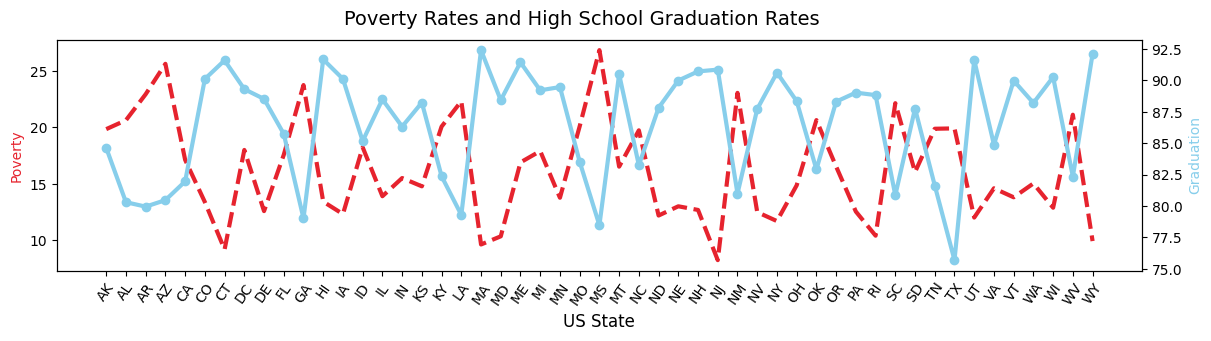

In [85]:
plt.figure(figsize=(14,3))
plt.suptitle('Poverty Rates and High School Graduation Rates', fontsize=14)
plt.xlabel('US State', fontsize=12)
plt.xticks(fontsize=10, rotation=55)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Poverty', color='#E6232E')
ax2.set_ylabel('Graduation', color='skyblue')

ax1.plot(poverty_vs.index, poverty_vs, color='#E6232E', linewidth=3, linestyle='--')
ax2.plot(graduation_vs.index, graduation_vs, color='skyblue', linewidth=3, marker='o')

plt.show()

In [89]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty.sort_values('poverty_rate', ascending=False, inplace=True)
poverty = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': pd.Series.mean})

In [91]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.sort_values('percent_completed_hs', ascending=False, inplace=True)
hs = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': pd.Series.mean})

In [93]:
merged = pd.merge(hs, poverty, on=['Geographic Area'], how='inner')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

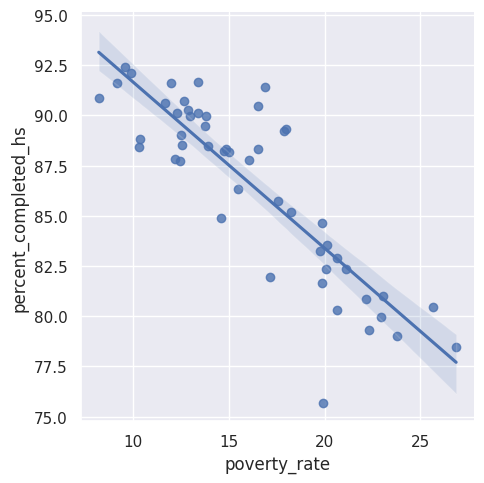

In [100]:
sns.set_theme(color_codes=True)

sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

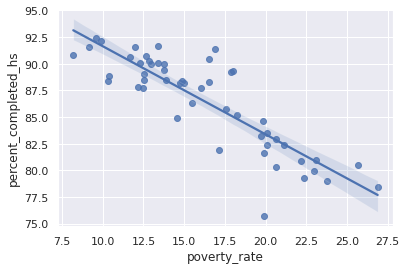

In [ ]:
sns.regplot(x='poverty_rate', y='percent_completed_hs', data=merged)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [104]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland city,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [114]:
df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']] = df_share_race_city[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].apply(pd.to_numeric, errors='coerce')

In [113]:
racial = df_share_race_city.groupby('Geographic area').agg({'share_white': 'mean', 'share_black': 'mean', 'share_native_american': 'mean', 'share_asian': 'mean', 'share_hispanic': 'mean'})
racial.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.65,0.57,45.86,1.39,2.15
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.87,2.69,1.72,5.57,29.65


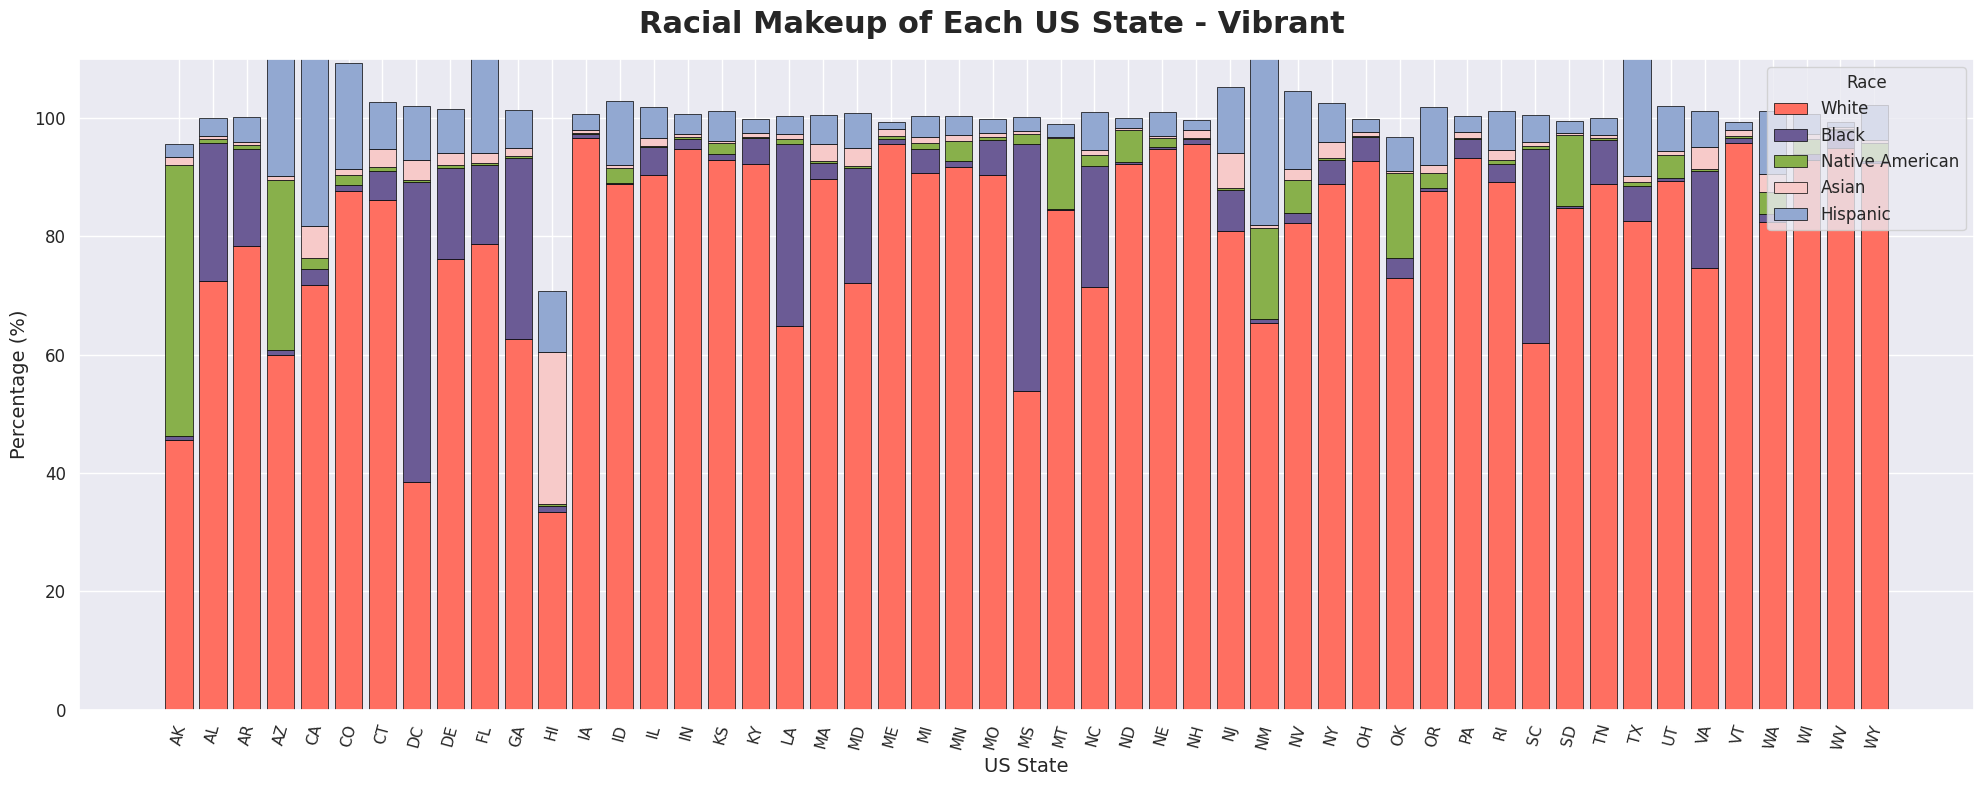

In [124]:
color_list2 = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']

plt.figure(figsize=(20,8))
plt.suptitle('Racial Makeup of Each US State - Vibrant', fontsize=22, weight='bold')
plt.ylabel('Percentage (%)', fontsize=14)
plt.xlabel('US State', fontsize=14)

bottom = np.zeros(len(racial))
for i, col in enumerate(['share_white','share_black','share_native_american','share_asian','share_hispanic']):
    plt.bar(racial.index, racial[col], bottom=bottom, color=color_list2[i], edgecolor='black', linewidth=0.5, label=race_labels[i])
    bottom += racial[col].values

plt.xticks(rotation=75, fontsize=11)
plt.yticks(fontsize=12)
plt.ylim(0,110)
plt.legend(title='Race', frameon=True, fontsize=12, title_fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()



# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [125]:
killed = df_fatalities.race.value_counts()
killed
df_fatalities.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

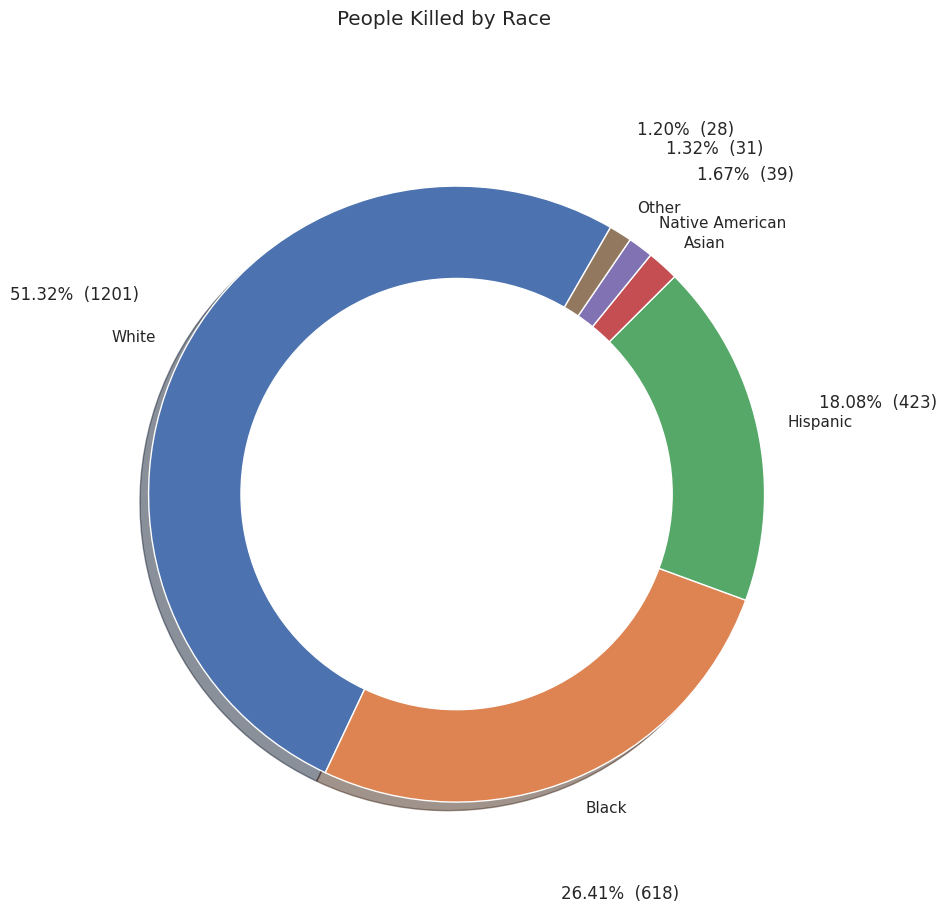

In [130]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(10,10))
plt.suptitle('People Killed by Race')
plt.pie(killed, labels=killed.index, autopct=make_autopct(killed), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [131]:
killed_gender = df_fatalities.gender.value_counts()
killed_gender

,count
gender,
M,2428
F,107


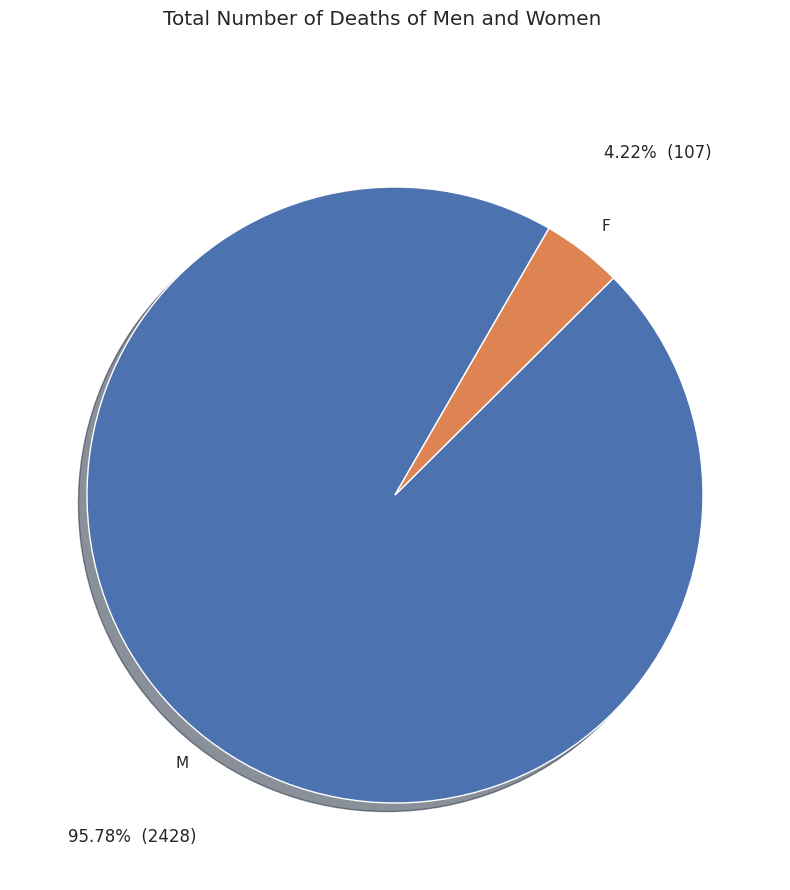

In [132]:
plt.figure(figsize=(10,10))
plt.suptitle('Total Number of Deaths of Men and Women')
plt.pie(killed_gender, labels=killed_gender.index, autopct=make_autopct(killed_gender), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)

plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [133]:
df_fatalities['age'] = df_fatalities['age'].replace(np.nan, 0)
df_fatalities.age.isnull().any()
death_age = df_fatalities[['age', 'manner_of_death', 'gender']]
death_age

,age,manner_of_death,gender
0,53.00,shot,M
1,47.00,shot,M
2,23.00,shot and Tasered,M
3,32.00,shot,M
4,39.00,shot,M
...,...,...,...
2530,31.00,shot,M
2531,0.00,shot,M
2532,48.00,shot,M
2533,28.00,shot,M


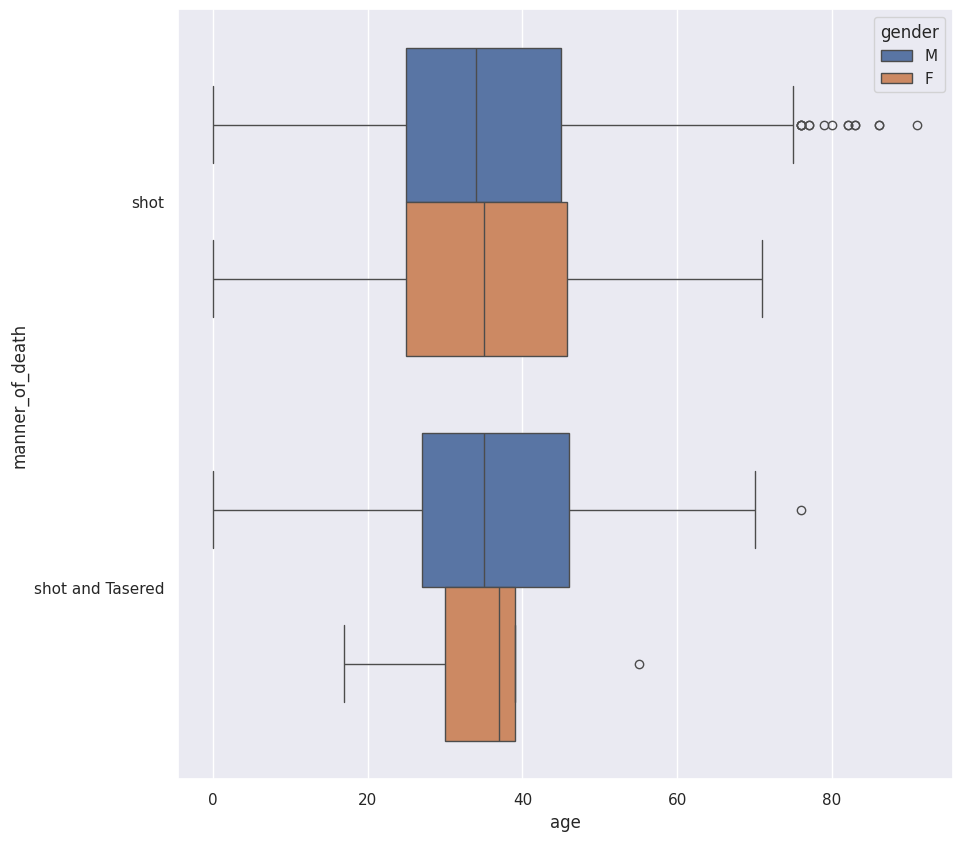

In [134]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age', y='manner_of_death', hue='gender', data=death_age)
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [147]:
armed = df_fatalities.copy()

weapons = ['gun', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'baton', 'spear', 'pitchfork', 'hatchet and gun',
       'rock', 'piece of wood', 'bayonet', 'pipe', 'glass shard',
       'motorcycle', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air conditioner', 'pole and knife',
       'baseball bat and bottle', 'fireworks', 'pen']

armed.armed = armed.armed.replace(weapons, 'armed')

armed.armed.unique()

array(['armed', 'unarmed', nan], dtype=object)

In [142]:
percentage = armed.armed.value_counts()
percentage

,count
armed,
armed,2355
unarmed,171


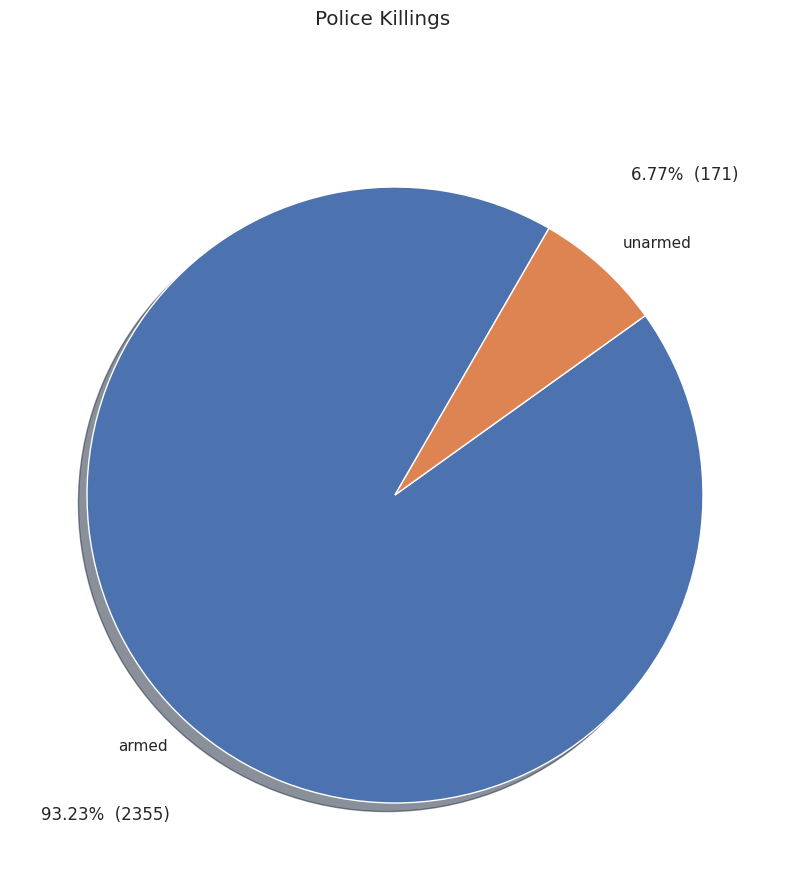

In [143]:
plt.figure(figsize=(10,10))
plt.suptitle('Police Killings')
plt.pie(percentage, labels=percentage.index, autopct=make_autopct(percentage), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)

plt.show()

In [145]:
arm = df_fatalities.armed.value_counts()
arm

,count
armed,
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
...,...
air conditioner,1
pole and knife,1
baseball bat and bottle,1


/tmp/ipython-input-1369711210.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(arm.index[n], arm[n])


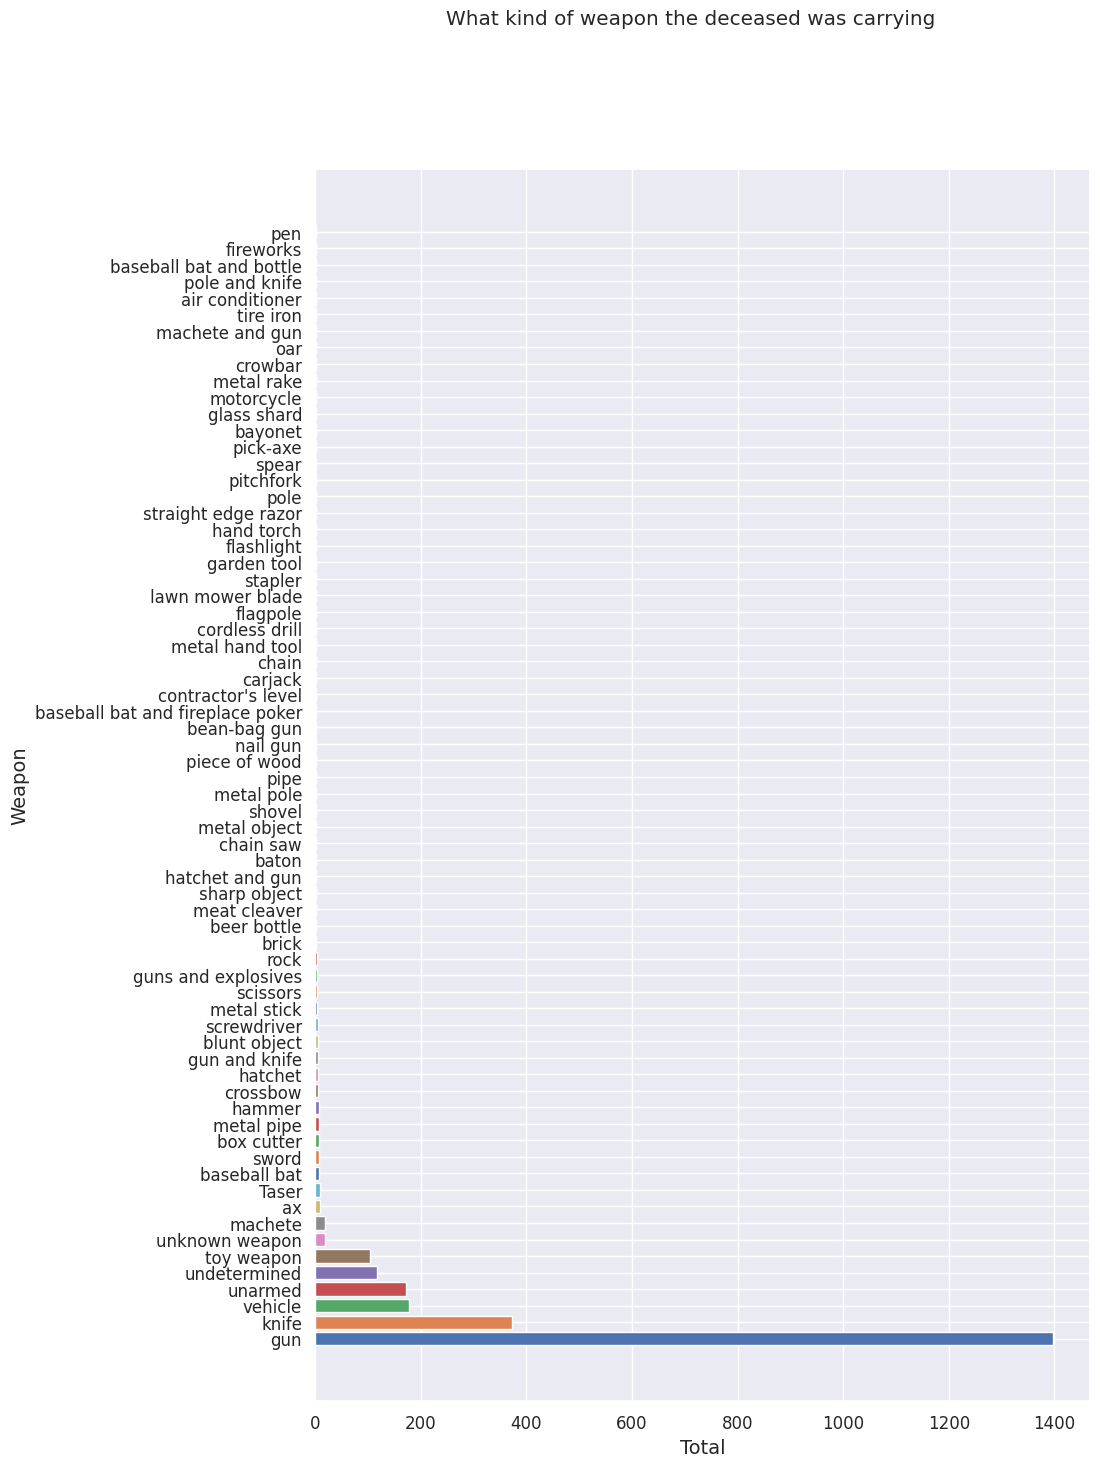

In [146]:
plt.figure(figsize=(10,16))
plt.suptitle('What kind of weapon the deceased was carrying')
plt.ylabel('Weapon', fontsize=14)
plt.xlabel('Total', fontsize=14)

for n in range(len(arm)):
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.barh(arm.index[n], arm[n])

plt.show()

# How Old Were the People Killed?

In [148]:
junior = df_fatalities.loc[df_fatalities['age'] < 25]
under = junior.id.count()

senior = df_fatalities.loc[df_fatalities['age'] > 25]
over = senior.id.count()

print(f"{round((under / over) * 100)}% of people killed were under 25 years old.")

28% of people killed were under 25 years old.


In [149]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,race_full
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False,Asian
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False,White
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False,Hispanic
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False,White
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False,Hispanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False,NaN
2531,2813,TK TK,28/07/17,shot,vehicle,0.00,M,NaN,Albuquerque,NM,False,attack,Car,False,NaN
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False,NaN
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True,Black


Histogram and KDE plot that shows the distribution of ages of the people killed by police.

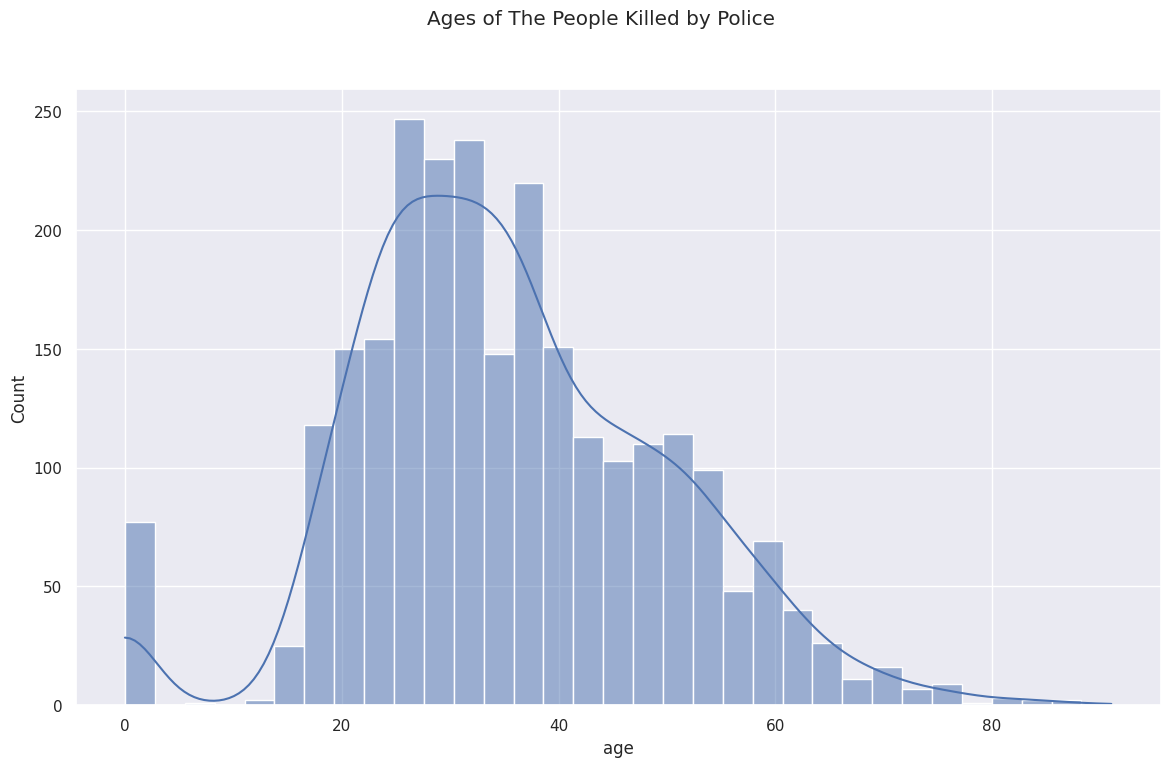

In [150]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police')
sns.histplot(data=df_fatalities, x="age", kde=True)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

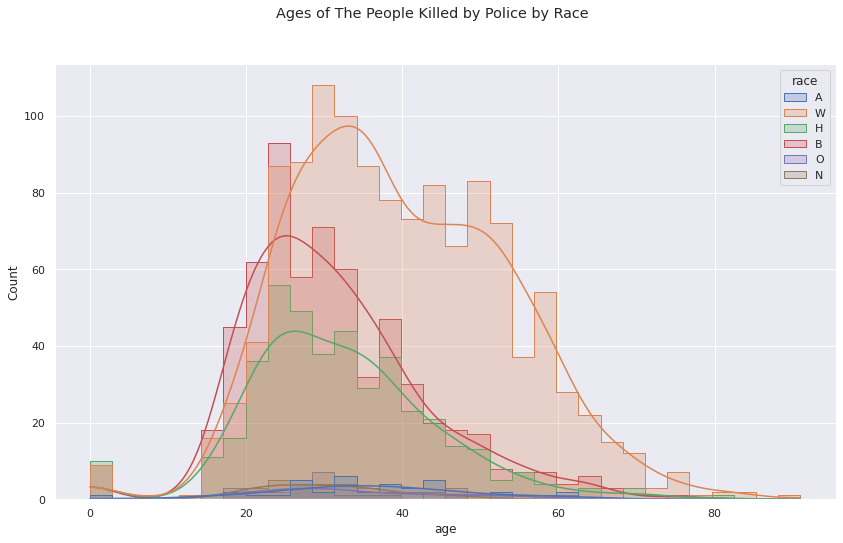

In [ ]:
plt.figure(figsize=(14,8))
plt.suptitle('Ages of The People Killed by Police by Race')
sns.histplot(data=df_fatalities, x="age", kde=True, hue='race', element='step')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [152]:
df_fatalities
mental = df_fatalities.signs_of_mental_illness.value_counts()
mental

,count
signs_of_mental_illness,
False,1902
True,633


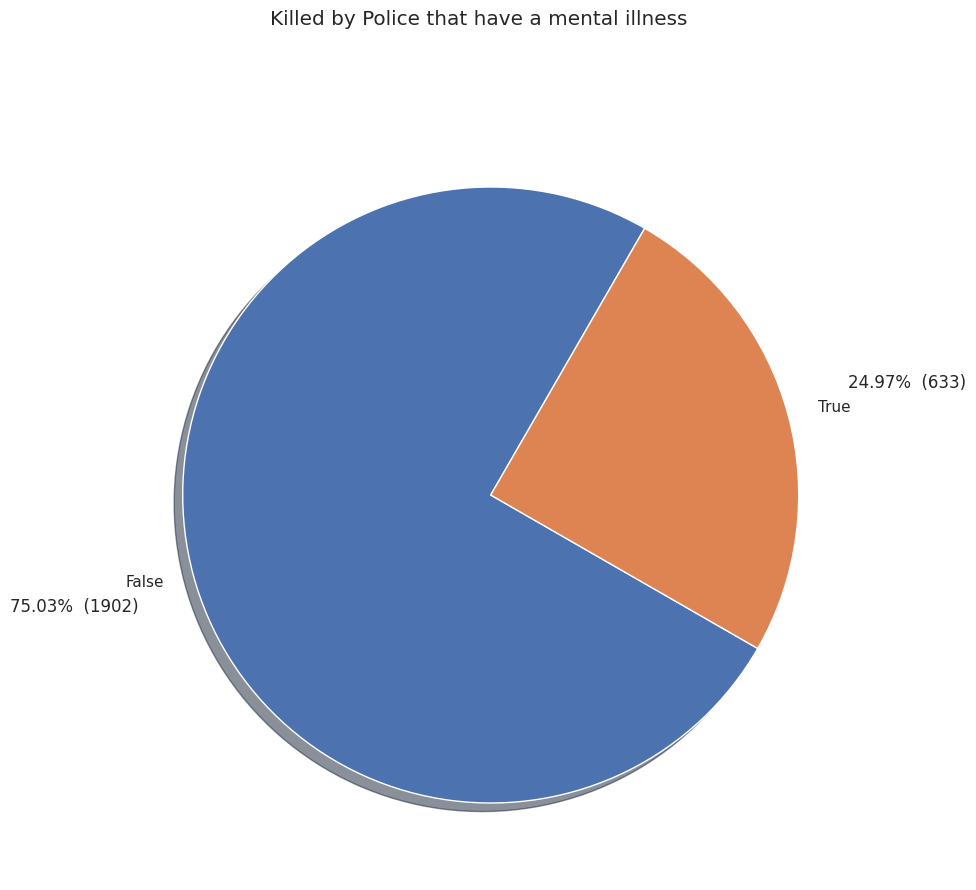

In [153]:
plt.figure(figsize=(10,10))
plt.suptitle('Killed by Police that have a mental illness')
plt.pie(mental, labels=mental.index, autopct=make_autopct(mental), shadow=True, startangle=60, pctdistance=1.4, labeldistance=1.1)
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [154]:
cities = df_fatalities.city.value_counts().head(10)
cities

,count
city,
Los Angeles,39
Phoenix,31
Houston,27
Chicago,25
Las Vegas,21
San Antonio,20
Columbus,19
Miami,18
Austin,18


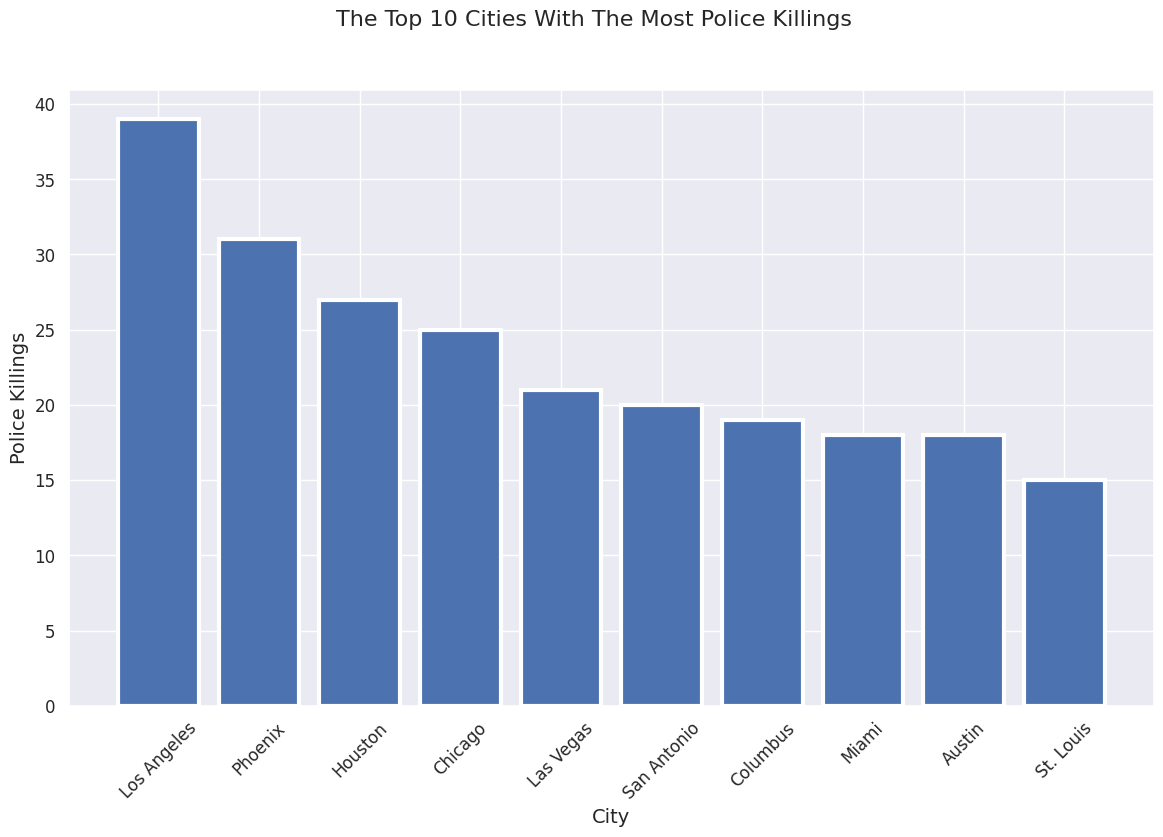

In [155]:
plt.figure(figsize=(14,8))
plt.suptitle('The Top 10 Cities With The Most Police Killings', fontsize=16)
plt.ylabel('Police Killings', fontsize=14)
plt.xlabel('City', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.bar(cities.index, cities, label=cities.index, linewidth=3)
plt.show()